<a href="https://colab.research.google.com/github/dimkeeen/DS/blob/main/UK_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import os
plt.style.use('dark_background')
# Download latest version
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")
print(path)
# Assuming the CSV file is named 'audi.csv', change to the actual file name if different
file_path = os.path.join(path, 'bmw.csv')  # Construct the full file path

/root/.cache/kagglehub/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/versions/3


In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [162]:
df = pd.read_csv(file_path)  # Read the CSV file

In [163]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [164]:
# X = df.drop('price', axis=1)
# y = df['price']

In [165]:
train, test = train_test_split(df, random_state=42)

<Axes: >

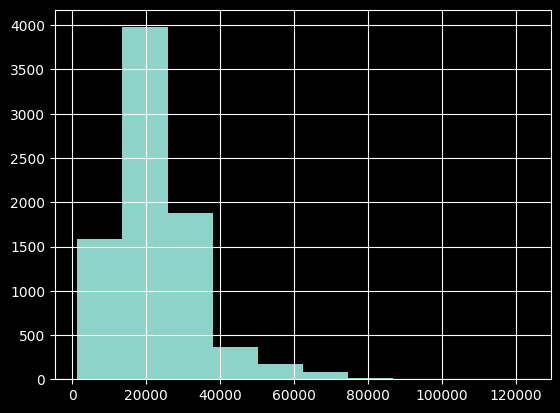

In [166]:
train['price'].hist(bins = 10)

In [167]:
train['price'].describe()

,price
count,8085.000000
mean,22668.821645
std,11469.825387
min,1445.000000
25%,14800.000000
50%,20022.000000
75%,27850.000000
max,123456.000000


In [168]:
train.groupby('year')['price'].agg(['count', 'mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


In [169]:
train['price_pred_mean'] = train['price'].mean()

In [170]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645
...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645


In [171]:
train['err'] = train['price'] - train['price_pred_mean']

In [172]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,-9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,-11718.821645
...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,-4673.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,-2718.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,2781.178355
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,-2818.821645


In [174]:
train['err_abs'] = train['err'].abs()

In [176]:
train['err_abs'].mean()

8450.556631461715

In [179]:
train['err_abs_pct'] = train['err_abs'] / train['price']

In [180]:
train['err_abs_pct'].mean()

0.48316912602731443